1️⃣ [Soal] Setup & Import Library
- Deskripsi:
- Pada tahap ini, kamu akan mengimpor semua library Python yang dibutuhkan untuk analisis data spasial dan statistik.

Soal:

1. Import semua library yang diperlukan untuk analisis data spasial dan statistik.
2. Jelaskan fungsi utama masing-masing library!

Hint:
Gunakan pandas, geopandas, folium, matplotlib, seaborn, numpy, dan shapely.

In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import Polygon, Point

Penjelasan Fungsi Library
- pandas → manipulasi dan analisis data tabular
- geopandas → pengolahan data spasial (GeoDataFrame, GeoJSON, Shapefile)
- folium → visualisasi peta interaktif berbasis Leaflet
- matplotlib → visualisasi data dasar (plot, histogram)
- seaborn → visualisasi statistik yang lebih informatif
- numpy → operasi numerik dan array
- shapely → operasi geometri (Point, Polygon, buffer, intersection)

2️⃣ [Soal] Load Data GeoJSON
- Deskripsi:
- Baca data pluvial flood point south west Nigeria dari file GeoJSON menggunakan geopandas.

Soal:

1. Load file data_point_pluvial_flood_dataset.geojson ke dalam GeoDataFrame.
2. Tampilkan 5 baris pertama data.

Hint:
Gunakan gpd.read_file(path) dan head().

In [2]:
# Load data GeoJSON
gdf = gpd.read_file("data_point_pluvial_flood_dataset.geojson")

# Show first 5 rows
gdf.head()

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP,geometry
0,3.909444,7.443056,46.686142,-3.888000e+09,45.000000,-3.250368,147.0,228.8528,101.515616,Very_High,POINT (3.90944 7.44306)
1,3.908611,7.442778,52.151768,1.296000e+09,60.945396,-4.313832,61.0,229.6781,80.409863,Very_High,POINT (3.90861 7.44278)
2,3.908889,7.442778,66.484085,0.000000e+00,67.619865,-8.327622,1.0,230.5920,78.986849,Very_High,POINT (3.90889 7.44278)
3,3.909167,7.442778,58.007183,-2.592000e+09,38.659809,-4.707937,51.0,235.4210,81.953151,Very_High,POINT (3.90917 7.44278)
4,3.909444,7.442778,60.503792,-1.296000e+09,351.869904,-5.985817,15.0,234.4346,85.866027,Very_High,POINT (3.90944 7.44278)


In [19]:
def fix_decimal_columns(df):
    for col in df.columns:
        if col not in ['geometry', 'SUSCEP']:
            # Convert to string first
            df[col] = df[col].astype(str)

            # Change comma to dot
            df[col] = df[col].str.replace(',', '.')

            # Convert to numeric
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

gdf = fix_decimal_columns(gdf)

In [ ]:
# Delete invalid slope values
gdf.loc[(gdf['Slope'] < 0) | (gdf['Slope'] > 90), 'Slope'] = np.nan

Penjelasan

Data GeoJSON berhasil dibaca menjadi GeoDataFrame yang berisi:
- atribut non-spasial (Slope, Rainfall, TWI, SUSCEP, dll)
- kolom geometry bertipe Point

3️⃣ [Soal] Eksplorasi Struktur Data
- Deskripsi:
- Lakukan eksplorasi awal untuk memahami struktur dan tipe data.

Soal:

1. Tampilkan info DataFrame (kolom, tipe data, jumlah data).
2. Tampilkan statistik deskriptif untuk parameter numerik.

Hint:

Gunakan info() dan describe().

In [17]:
# Information about the GeoDataFrame
gdf.info()

# Statistical summary of the data
gdf.describe()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   X           144401 non-null  float64 
 1   Y           144401 non-null  float64 
 2   Slope       144013 non-null  float64 
 3   Curvature   144401 non-null  float64 
 4   Aspect      144401 non-null  float64 
 5   TWI         144401 non-null  float64 
 6   FA          144401 non-null  float64 
 7   Drainage    144401 non-null  float64 
 8   Rainfall    144401 non-null  float64 
 9   SUSCEP      144401 non-null  str     
 10  geometry    144401 non-null  geometry
dtypes: float64(9), geometry(1), str(1)
memory usage: 12.1 MB


,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall
count,144401.000000,144401.000000,144013.000000,1.444010e+05,1.444010e+05,1.444010e+05,1.444010e+05,144401.000000,144401.000000
mean,3.891534,7.374551,58.183881,-8.342043e+35,-1.673122e+35,-2.120858e+34,-2.120858e+35,219.714542,74.786932
std,0.027887,0.032459,15.157870,1.682769e+37,7.543591e+36,2.686356e+36,8.492619e+36,7.057921,8.891617
min,3.831111,7.311389,0.000000,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,203.729300,59.541096
25%,3.868889,7.348333,51.340191,-2.592000e+09,1.013099e+02,-8.654586e+00,0.000000e+00,214.286900,68.140822
50%,3.891667,7.374167,61.980232,0.000000e+00,1.894623e+02,-8.006991e+00,1.000000e+00,220.631300,73.873425
75%,3.913611,7.400278,69.167122,2.592000e+09,2.700000e+02,-6.709276e+00,6.000000e+00,224.191400,81.329315
max,3.954444,7.443056,86.575409,3.888000e+10,3.591449e+02,1.168344e+01,4.579360e+05,235.421000,101.515616


Penjelasan
- info() → melihat jumlah data, tipe kolom, dan missing value
- describe() → ringkasan statistik (mean, min, max, std) untuk parameter numerik

Ini digunakan untuk memahami sebaran awal data flood.

4️⃣ [Soal] Visualisasi Distribusi Parameter
- Deskripsi:
- Visualisasikan distribusi beberapa parameter penting (misal: Slope, Rainfall, TWI).

Soal:

1. Buat histogram untuk parameter Slope dan Rainfall.
2. Apa yang bisa kamu simpulkan dari distribusi data tersebut?

Hint:
Gunakan sns.histplot() dan plt.show().

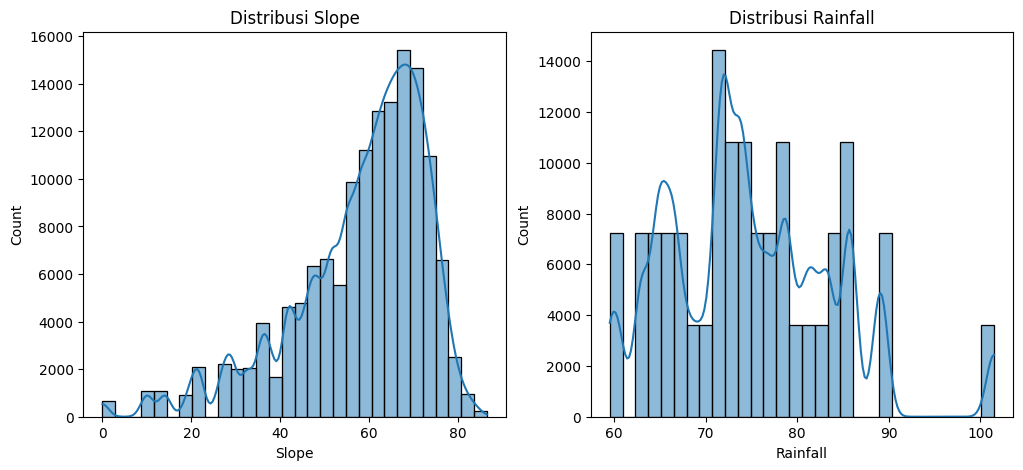

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(gdf['Slope'], bins=30, kde=True)
plt.title("Distribusi Slope")

plt.subplot(1,2,2)
sns.histplot(gdf['Rainfall'], bins=30, kde=True)
plt.title("Distribusi Rainfall")

plt.show()

Kesimpulan
- Slope cenderung terkonsentrasi pada nilai rendah → area relatif datar lebih rentan genangan
- Rainfall menunjukkan variasi cukup besar → curah hujan berperan penting dalam flood susceptibility

5️⃣ [Soal] Analisis Kategori Susceptibility
- Deskripsi:
- Analisis sebaran kategori susceptibility (SUSCEP) pada dataset.

Soal:

1. Hitung jumlah titik per kategori susceptibility.
2. Visualisasikan hasilnya dengan bar chart.

Hint:

Gunakan value_counts() dan sns.countplot().

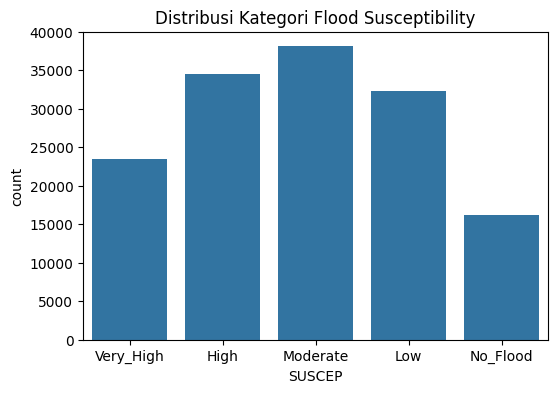

In [20]:
# Count values in SUSCEP
suscep_count = gdf['SUSCEP'].value_counts()
suscep_count

# Visualization of SUSCEP distribution
plt.figure(figsize=(6,4))
sns.countplot(x='SUSCEP', data=gdf)
plt.title("Distribusi Kategori Flood Susceptibility")
plt.show()

Penjelasan

Analisis ini menunjukkan kategori kerentanan banjir mana yang paling dominan

6️⃣ [Soal] Scatter Plot Hubungan Parameter
- Deskripsi:
- Analisis hubungan antara dua parameter, misal Slope vs Rainfall.

Soal:

1. Buat scatter plot antara Slope dan Rainfall.
2. Apakah ada pola tertentu yang terlihat?

Hint:

Gunakan sns.scatterplot().

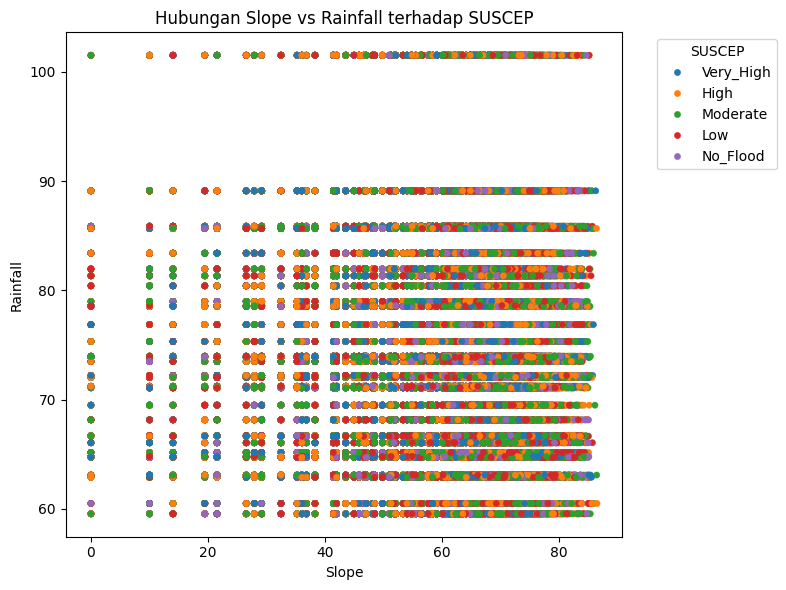

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='Slope',
    y='Rainfall',
    hue='SUSCEP',
    data=gdf,
    s=20,
    edgecolor=None
)

plt.title("Hubungan Slope vs Rainfall terhadap SUSCEP")
plt.xlabel("Slope")
plt.ylabel("Rainfall")
plt.legend(title="SUSCEP", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


Kesimpulan

1. Tidak terlihat hubungan linear langsung antara Slope dan Rainfall.
    
    Titik-titik tersebar secara vertikal pada berbagai nilai slope, yang menunjukkan bahwa besarnya curah hujan (rainfall) tidak dipengaruhi oleh kemiringan lereng (slope).

2. Pola yang terlihat lebih berkaitan dengan kategori SUSCEP.
    
    Titik dengan kategori Very High dan High SUSCEP cenderung lebih banyak muncul pada:
    - nilai slope rendah (area datar)
    - nilai rainfall tinggi

    Sebaliknya, kategori Low atau No_Flood lebih sering muncul pada area dengan:
    - slope lebih tinggi
    - atau rainfall yang relatif lebih rendah

3. Hal ini menunjukkan bahwa:
    - Rainfall memiliki hubungan positif terhadap SUSCEP
    
    Semakin tinggi curah hujan, semakin tinggi potensi kerentanan banjir.

    - Slope memiliki hubungan negatif terhadap SUSCEP
    
    Area yang lebih datar (slope kecil) lebih rentan terhadap genangan dibanding area yang curam.

7️⃣ [Soal] Heatmap Korelasi Parameter
- Deskripsi:
- Lihat korelasi antar parameter numerik pada dataset.

Soal:

1. Hitung matriks korelasi antar parameter numerik.
2. Visualisasikan dengan heatmap.

Hint:

Gunakan corr() dan sns.heatmap().

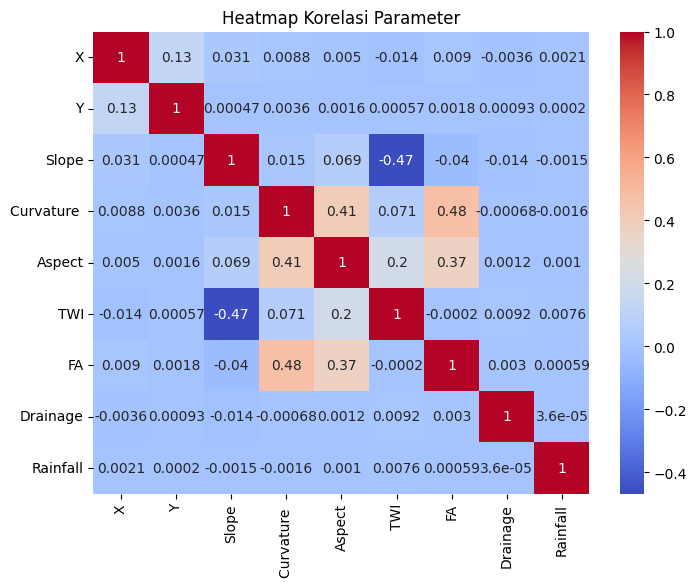

In [22]:
# Get only numeric columns
numeric_cols = gdf.select_dtypes(include=[np.number])

# Matrix korelasi
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Parameter")
plt.show()

Penjelasan

Heatmap membantu:
- Mengidentifikasi parameter yang paling berpengaruh

8️⃣ [Soal] Peta Interaktif Titik Flood
- Deskripsi:
- Pada tahap ini, kamu akan membuat peta interaktif yang hanya menampilkan sebagian kecil titik flood dari dataset (bukan seluruh data dan tanpa analisis outlier).
- Tujuannya agar peta lebih informatif, tidak terlalu padat, dan mudah dianalisis.

Soal:

1. Pilih dan filter data flood yang ingin divisualisasikan (misal: 5 titik acak dari seluruh dataset).
2. Buat peta interaktif yang hanya menampilkan titik-titik hasil filter.
3. Tambahkan popup/tooltip pada setiap marker yang menampilkan nilai susceptibility dan parameter penting (misal: Slope, Rainfall, TWI).
4. Simpan peta sebagai file HTML dan pastikan bisa dibuka di browser.

Hint:

1. Gunakan metode filter DataFrame seperti .sample(n) untuk mengambil n titik acak.
2. Gunakan folium.Map(), folium.Marker(), dan folium.Popup() untuk visualisasi.
3. Simpan peta dengan m.save('nama_file.html').

In [23]:
sample_gdf = gdf.sample(n=5, random_state=42)

# Create a centroid of the sample points
center = [sample_gdf.geometry.y.mean(), sample_gdf.geometry.x.mean()]

m = folium.Map(location=center, zoom_start=7)

for _, row in sample_gdf.iterrows():
    popup_text = f"""
    <b>SUSCEP:</b> {row['SUSCEP']}<br>
    <b>Slope:</b> {row['Slope']}<br>
    <b>Rainfall:</b> {row['Rainfall']}<br>
    <b>TWI:</b> {row['TWI']}
    """
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=popup_text
    ).add_to(m)

# Save map to HTML
m.save("flood_sample_map.html")

Hasil
- Peta hanya menampilkan 5 titik flood
- Setiap marker memiliki popup informatif